## 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\DATA ANALYSIS\Ultimate Projects\Loan-Approval-Prediction-Analysis\PYTHON\loan_approval_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Dataframe Description

In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## 2.Data cleaning

In [5]:
#Checking for duplicates
df.duplicated(keep=False).sum()

0

In [6]:
#Convert values in column to absolute value
df[' residential_assets_value']=df[' residential_assets_value'].abs()
#Count if there any negative values left
(df[' residential_assets_value']<0).sum()

0

In [7]:
#remove extra white spaces from column names
df.columns=df.columns.str.strip()
#remove extra  white spaces from values in the dataframe
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 3.Addition of colmns in the dataframe based on condition

## Addition of the cibil_rating column to the database

In [11]:

df["cibil_rating"] = df["cibil_score"].apply(
    lambda x: "Poor" if 300 <= x <= 549 
    else ("Average" if 550 <= x <= 649 
    else ("Good" if 650 <= x <= 749 
    else ("Excellent" if 750 <= x <=900 
    else "Invalid")))
)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent


## Addition of the income levels column to the database

In [12]:
df["income_level"] = df["income_annum"].apply(
    lambda x: "Low" if 100000 <= x <= 1000000 
    else ("Lower-middle" if 1000001 <= x <= 4000000 
    else ("Upper-middle" if 4000001 <= x <= 7500000 
    else ("High" if 7500001 <= x <=10000000 
    else "Invalid")))
)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor,Low
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average,Lower-middle
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor,Upper-middle
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent,Upper-middle


## Addition of the loan amount ratings column to the database

In [13]:
df["loan_amount_ratings"] = df["loan_amount"].apply(
    lambda x: "Bronze" if 100000 <= x <= 10000000 
    else ("Silver" if 10000001 <= x <= 20000000 
    else ("Gold" if 20000001 <= x <= 30000000 
    else ("Platinum" if 30000001 <= x <= 40000000 
    else "Invalid")))
)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_amount_ratings
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor,Low,Bronze
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average,Lower-middle,Silver
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor,Upper-middle,Gold
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent,Upper-middle,Silver


## Addition of the Loan term column to the database

In [14]:
df["loan_term_label"] = df["loan_term"].apply(
    lambda x: "Short-Term" if 0 <= x <= 7 
    else ("Intermediate" if 8 <= x <= 14 
    else ("Long-Term" if 15 <= x <= 20  
    else "Invalid"))
)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_amount_ratings,loan_term_label
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor,Low,Bronze,Intermediate
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average,Lower-middle,Silver,Long-Term
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor,Upper-middle,Gold,Long-Term
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent,Upper-middle,Silver,Intermediate


## Addition of the dependent column to the database

In [15]:
df["dependent_levels"] = df["no_of_dependents"].apply(
    lambda x: "Low" if 0 <= x <= 1 
    else ("Moderate" if 2 <= x <= 3 
    else ("High" if 4 <= x <= 5 
    else "Invalid"))
)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_amount_ratings,loan_term_label,dependent_levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor,Low,Bronze,Intermediate,High
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average,Lower-middle,Silver,Long-Term,Low
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor,Upper-middle,Gold,Long-Term,Moderate
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent,Upper-middle,Silver,Intermediate,Low


## 4.Creating new csv file which will consists the modified cleaned table/data

In [16]:
output_folder = r'C:\Users\User\Desktop\DATA ANALYSIS\Ultimate Projects\Loan-Approval-Prediction-Analysis\SQL'  # Change as needed

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save cleaned CSV
output_file = os.path.join(output_folder, 'Cleaned_loan_approval_dataset.csv')
df.to_csv(output_file, index=False)

print(f"Cleaned data saved to: {output_file}")

Cleaned data saved to: C:\Users\User\Desktop\DATA ANALYSIS\Ultimate Projects\Loan-Approval-Prediction-Analysis\SQL\Cleaned_loan_approval_dataset.csv


## 5.Exploratory Data Analysis

## Customer Segmentation

## Income

In [17]:
#grouping customers based on income
income = df['income_level'].value_counts().reset_index().rename(columns={'index':'income_level','income_level':'number_of_applicants'})
income

,income_level,number_of_applicants
0,Upper-middle,1548
1,Lower-middle,1284
2,High,1047
3,Low,390


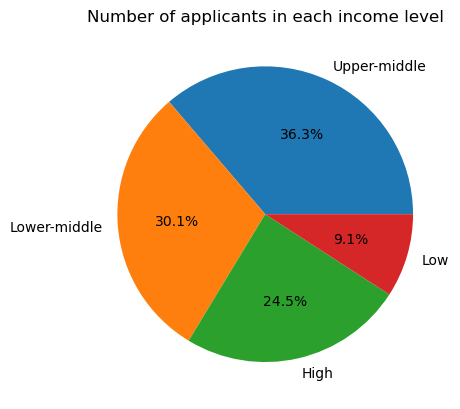

In [18]:
#plotting a pie chart of income
plt.pie(income["number_of_applicants"],labels=income["income_level"],autopct="%1.1f%%")
plt.title("Number of applicants in each income level")
plt.show()

## Segment according to the number of dependents

In [19]:
#grouping customers based on income
dependents = df['dependent_levels'].value_counts().reset_index().rename(columns={'index':'dependent_levels','dependent_levels':'number_of_applicants'})
dependents

,dependent_levels,number_of_applicants
0,Moderate,1435
1,High,1425
2,Low,1409


## Segment according to education

In [20]:
edu = df['education'].value_counts().reset_index().rename(columns={'index':'education','education':'number_of_applicants'})
edu

,education,number_of_applicants
0,Graduate,2144
1,Not Graduate,2125


## Segment according to employment

In [21]:
emp = df['self_employed'].value_counts().reset_index().rename(columns={'index':'self_employed','self_employed':'number_of_applicants'})
emp

,self_employed,number_of_applicants
0,Yes,2150
1,No,2119


## Rate of loan approvals

## Overal Rate

In [22]:
rate = df['loan_status'].value_counts().reset_index().rename(columns={'index':'loan_status','loan_status':'number_of_applicants'})
rate

,loan_status,number_of_applicants
0,Approved,2656
1,Rejected,1613


## Loan approvals by educational level and loan status

In [23]:
#group data by education and loan status
ed=df.groupby(['education', 'loan_status']).size().reset_index(name='number_of_applicants')
ed

,education,loan_status,number_of_applicants
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


In [24]:
# Creating a pivot table
pivot_table=ed.pivot(index='education',columns='loan_status',values='number_of_applicants')
approval_total=pivot_table.sum(axis='index')
#educated=pivot_table.max(axis=1)
percentage=pivot_table.div(approval_total,axis='columns')*100

pivot_table

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


In [25]:
approval_total

loan_status
Approved    2656
Rejected    1613
dtype: int64

In [26]:
percentage

loan_status,Approved,Rejected
education,,
Graduate,50.414157,49.907006
Not Graduate,49.585843,50.092994


Text(0.5, 1.0, 'Loan approvals by educational level')

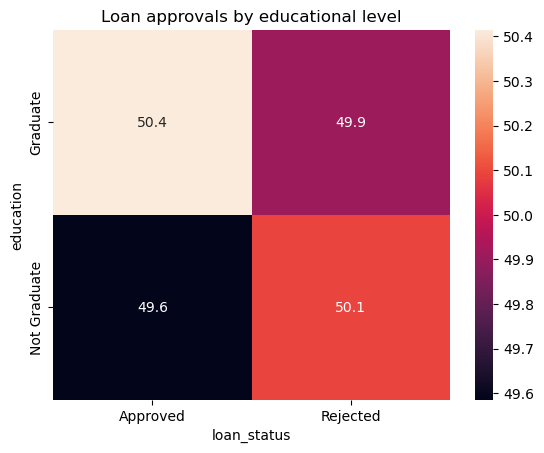

In [27]:
sns.heatmap(percentage,annot=True,fmt='.1f')
plt.title('Loan approvals by educational level')

## Loan approval according to type of employment

In [28]:
em=df.groupby(['self_employed','loan_status']).size().reset_index(name='number_of_applicants')
em

,self_employed,loan_status,number_of_applicants
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


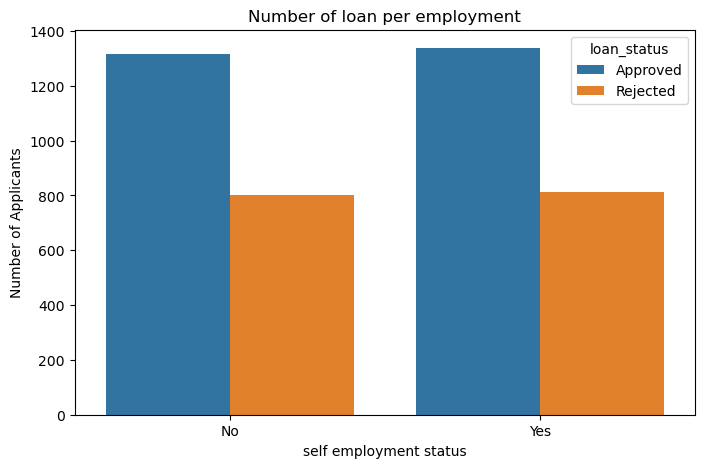

In [29]:
#Creating a barplot
plt.figure(figsize=(8,5))
sns.barplot(data=em, x='self_employed', y='number_of_applicants', hue='loan_status')
plt.title('Number of loan per employment')
plt.ylabel('Number of Applicants')
plt.xlabel('self employment status')
plt.show()

## Loan Approval by CIBIL Ratings

## The influence of cibil rating in loan approval

In [30]:
cr=df.groupby(['cibil_rating','loan_status']).size().reset_index(name='number_of_applicants')
order_list = ['Poor', 'Average', 'Good', 'Excellent']

# Convert column to ordered categorical
cr['cibil_rating'] = pd.Categorical(
    cr['cibil_rating'], 
    categories=order_list, 
    ordered=True
)
cr=cr.sort_values(by='cibil_rating')
cr

,cibil_rating,loan_status,number_of_applicants
6,Poor,Approved,185
7,Poor,Rejected,1600
0,Average,Approved,681
1,Average,Rejected,2
4,Good,Approved,740
5,Good,Rejected,5
2,Excellent,Approved,1050
3,Excellent,Rejected,6


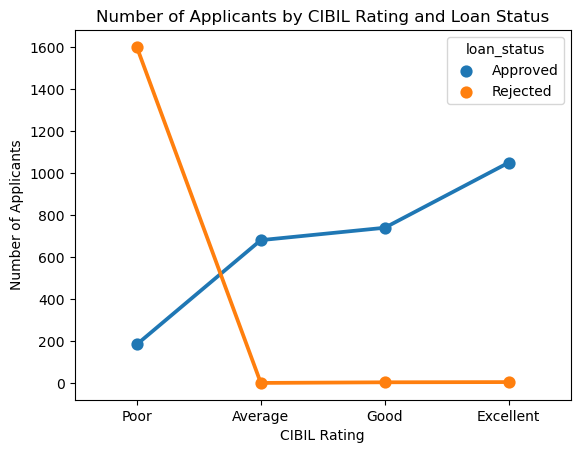

In [31]:
sns.pointplot(x='cibil_rating', y='number_of_applicants', hue='loan_status', data=cr)
plt.title('Number of Applicants by CIBIL Rating and Loan Status')
plt.ylabel('Number of Applicants')
plt.xlabel('CIBIL Rating')
plt.show()

## Loan approval by Income level

In [32]:
i_l=df.groupby(['income_level','loan_status']).size().reset_index(name='number_of_applicants')
i_l

,income_level,loan_status,number_of_applicants
0,High,Approved,649
1,High,Rejected,398
2,Low,Approved,254
3,Low,Rejected,136
4,Lower-middle,Approved,810
5,Lower-middle,Rejected,474
6,Upper-middle,Approved,943
7,Upper-middle,Rejected,605


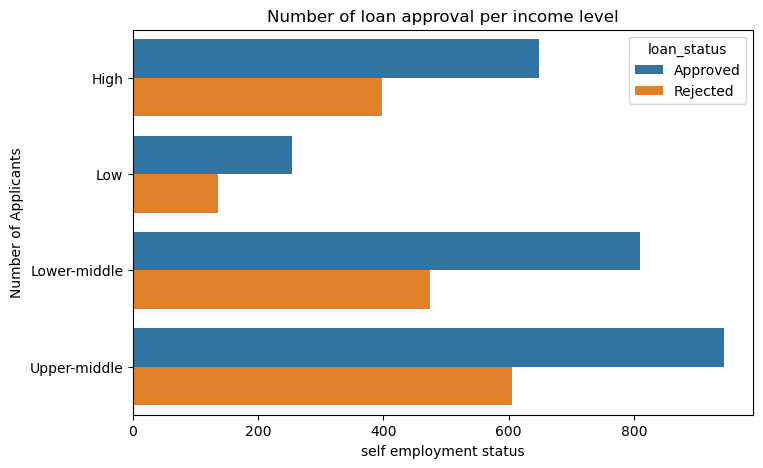

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data=i_l, y='income_level', x='number_of_applicants', hue='loan_status')
plt.title('Number of loan approval per income level')
plt.ylabel('Number of Applicants')
plt.xlabel('self employment status')
plt.show()

## 6.Correlation Analysis

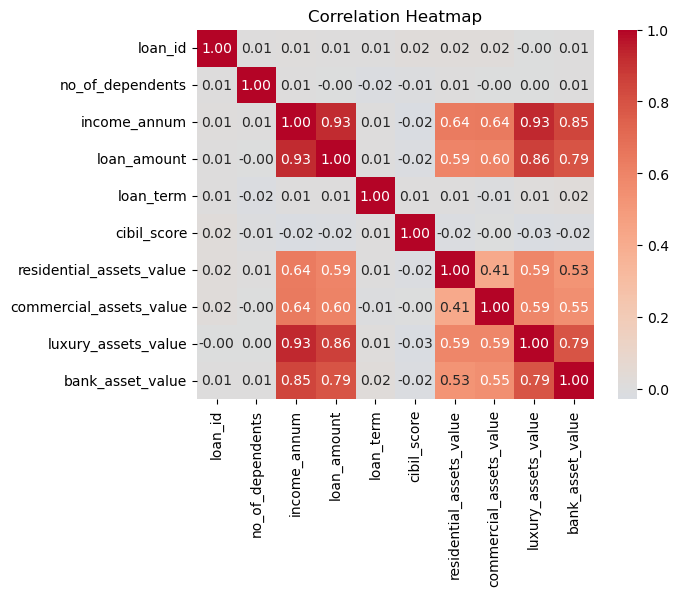

In [34]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
#correlation between asset values and income
assets=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
income=['income_annum']
correlations=df[assets+income].corr()
correlations

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [36]:
#correlation between asset values and loan
assets=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
loan=['loan_amount']
correlation=df[assets+loan].corr()
correlation

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


## Asset value impact/influence on loan approval/eligibility

## If there is a relation between asset value and getting a loan approval

In [37]:
#correlation between asset values and loan approval
assets=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
for columns in assets:
    t_stat,p_value=ttest_ind(df[df['loan_status']=='Approved'][columns],df[df['loan_status']=='Rejected'][columns])
    print(f"T-test for {columns}:")
    print(f"T-statistic:{t_stat}")
    print(f"P_value:{p_value}")
    if p_value<0.05:
       print(f"The difference in :{columns} between approved and rejected loans are statistically significant")
    else:
        print(f"The difference in :{columns} between approved and rejected loans are statistically not significant")

T-test for residential_assets_value:
T-statistic:-0.9401475234865276
P_value:0.34719511181931084
The difference in :residential_assets_value between approved and rejected loans are statistically not significant
T-test for commercial_assets_value:
T-statistic:0.5386572129716206
P_value:0.5901515011092731
The difference in :commercial_assets_value between approved and rejected loans are statistically not significant
T-test for luxury_assets_value:
T-statistic:-1.0103109823325898
P_value:0.31240360685550905
The difference in :luxury_assets_value between approved and rejected loans are statistically not significant
T-test for bank_asset_value:
T-statistic:-0.4427933015681088
P_value:0.6579376940182001
The difference in :bank_asset_value between approved and rejected loans are statistically not significant


## Using Anova to determine a correlation between income and asset value

In [38]:
f_stat,p_value=f_oneway(df['residential_assets_value'],df['commercial_assets_value'],df['luxury_assets_value'],df['bank_asset_value'],df['income_annum'])
print(f"F-statistic:{f_stat}")
print(f"P_value:{p_value}")
if p_value<0.05:
    print(f"There is a significant influence on income and asset value")
else:
    print(f"There is no significant influence on income and asset value") 
    

F-statistic:2518.654468935116
P_value:0.0
There is a significant influence on income and asset value


## Correlation between income and loan amount

In [39]:
t_stat,p_value=ttest_ind(df['income_annum'],df['loan_amount'])
print(f"F-statistic:{t_stat}")
print(f"P_value:{p_value}")
if p_value<0.05:
    print(f"There is a significant influence on income and asset value")
else:
    print(f"There is no significant influence on income and asset value") 

F-statistic:-69.51489699866843
P_value:0.0
There is a significant influence on income and asset value


## Chi-Square Analysis:Determine correlation between loan status and number of dependents

In [40]:
ct=pd.crosstab(df['loan_status'],df['dependent_levels'])
chi2,p_value,dof,expected=stats.chi2_contingency(ct)
print(f"Chi-Square statistic:{chi2}")
print(f"P_value:{p_value}")
print(f"dof:{p_value}")
if p_value<0.05:
    print(f"There is a significant relationship between loan status and number of dependence")
else:
    print(f"There is no significant relationship between loan status and number of dependence") 


Chi-Square statistic:1.1296798036848839
P_value:0.5684511474541935
dof:0.5684511474541935
There is no significant relationship between loan status and number of dependence


## 7.Logistic Regression

In [41]:
# Features & target
df['loan_status'] = df['loan_status'].map({'Rejected':0, 'Approved':1})
X = df[['education']]
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Encode education
X['education'] = pd.Categorical(X['education'], categories=['Not Graduate','Graduate'])
enc = OneHotEncoder(drop=None)
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)

# Logistic regression
model = LogisticRegression().fit(X_train_enc, y_train)

# Coefficient and odds ratio
coef = model.coef_[0][0]
odds_graduated = np.exp(coef)        # effect for Graduated vs baseline
print("Coefficient (effect of Graduated vs Non Graduated):", coef)

print(
    f"Decision: Graduated applicants have "
    + ("higher" if coef > 0 else "lower" if coef < 0 else "the same")
    + f" odds of loan approval"
    + (f" and it's {odds_graduated:.2f} times compared to Non Graduated." if coef != 0 else ".")
)




Coefficient (effect of Graduated vs Non Graduated): 0.02373469827961613
Decision: Graduated applicants have higher odds of loan approval and it's 1.02 times compared to Non Graduated.


C:\Users\User\AppData\Local\Temp\ipykernel_3736\996311030.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = pd.Categorical(X['education'], categories=['Not Graduate','Graduate'])


In [42]:
# Features & target
X = df[['self_employed']]
y = df['loan_status']  # already mapped 0/1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Encode self_employed (baseline = No)
X['self_employed'] = pd.Categorical(X['self_employed'], categories=['No','Yes'])
enc = OneHotEncoder(drop=None)
X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)

# Logistic regression
model = LogisticRegression().fit(X_train_enc, y_train)

# Coefficient and odds ratio
coef = model.coef_[0][1]
odds_self_employed = np.exp(coef)  # effect for Yes vs No

print("Coefficient (effect of Self Employed Yes vs No):", coef)

print(
    f"Decision: Self Employed (Yes) applicants have "
    + ("higher" if coef > 0 else "lower" if coef < 0 else "the same")
    + f" odds of loan approval"
    + (f" and it's {odds_self_employed:.2f} times compared to Non Self Employed." if coef != 0 else ".")
)


Coefficient (effect of Self Employed Yes vs No): 0.007846601682336331
Decision: Self Employed (Yes) applicants have higher odds of loan approval and it's 1.01 times compared to Non Self Employed.


C:\Users\User\AppData\Local\Temp\ipykernel_3736\2393640023.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['self_employed'] = pd.Categorical(X['self_employed'], categories=['No','Yes'])
